<a href="https://www.kaggle.com/code/sofiamatias/learning-equality-challenge-finalver?scriptVersionId=121487578" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import sys, os
sys.path.append("../input/sentence-transformer-package/sentence-transformers-2.2.2/sentence-transformers-2.2.2") 
import sentence_transformers
from sentence_transformers import SentenceTransformer, CrossEncoder, util

In [2]:
import numpy as np
import pandas as pd
import string
import torch

# Loading dataframes

In [3]:
challenge_files_path = '/kaggle/input/learning-equality-curriculum-recommendations'
private_files_path = '/kaggle/input/learningequalityfiles'
model_files_path = '/kaggle/input/sentence-transformer-package'

print (f"\nLoading dataframes...")

for dirname, _, filenames in os.walk(challenge_files_path):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print (f"\nLoading dataframe from {filepath}...")
        df = pd.read_csv (filepath)
        if 'topics' in filepath:
            topics_df = df.fillna({"title": "", "description": ""})
            display(topics_df)
        elif 'sample_submission' in filepath:
            print (f"\nLoading 'sample' dataframe...")
            sample_df = df
            display(sample_df)
        elif 'correlations' in filepath:
            correlations_df = df.fillna({"title": "", "description": ""})
            display(correlations_df)
            print (f"\nCreating exploded correlations 'corr' dataframe")
            corr_df = correlations_df.copy()
            corr_df['content_ids'] = corr_df.content_ids.str.split(' ')
            corr_df = corr_df.explode('content_ids')
            display (corr_df)
        elif 'content' in filepath:
            contents_df = df.fillna({"title": "", "description": "", "text": ""})
            display(contents_df)
print (f"\nDataframes loaded.")


Loading dataframes...

Loading dataframe from /kaggle/input/learning-equality-curriculum-recommendations/sample_submission.csv...

Loading 'sample' dataframe...


topic_id                                        content_ids
0  t_00004da3a1b2  c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1  t_00068291e9a4  c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2  t_00069b63a70a                                     c_11a1dc0bfb99
3  t_0006d41a73a8  c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4  t_4054df11a74e                      c_3695c5dc1df6 c_f2d184a98231


Loading dataframe from /kaggle/input/learning-equality-curriculum-recommendations/topics.csv...


id                                              title  \
0      t_00004da3a1b2                         Откриването на резисторите   
1      t_000095e03056             Unit 3.3 Enlargements and Similarities   
2      t_00068291e9a4                    Entradas e saídas de uma função   
3      t_00069b63a70a                                        Transcripts   
4      t_0006d41a73a8  Графики на експоненциални функции (Алгебра 2 н...   
...               ...                                                ...   
76967  t_fffb0bf2801d                             4.3 Graph of functions   
76968  t_fffbe1d5d43c                   Inscribed shapes problem solving   
76969  t_fffe14f1be1e                                          Lección 7   
76970  t_fffe811a6da9  تحديد العلاقة بين الإحداثيّات القطبية والإحداث...   
76971  t_fffe88835149  Formation of shadows and eclipses (umbra and p...   

                                             description channel category  \
0      Изследване на материали, които предизвикват на...  000cf7   source   
1                                                         b3f329  aligned   
2                   Entenda um pouco mais sobre funções.  8e286a   source   
3                                                         6e3ba4   source   
4      Научи повече за графиките на сложните показате...  000cf7   source   
...                                                  ...     ...      ...   
76967                                                     e77b55  aligned   
76968  Use properties of inscribed angles to prove pr...  0c929f   source   
76969                                                     6e90a7  aligned   
76970                           5b9e5ca86571f90499ea987f  9fd860   source   
76971                                                     c7ca13  aligned   

       level language          parent  has_content  
0          4       bg  t_16e29365b50d         True  
1          2       en  t_aa32fb6252dc        False  
2          4       pt  t_d14b6c2a2b70         True  
3          3       en  t_4054df11a74e         True  
4          4       bg  t_e2452e21d252         True  
...      ...      ...             ...          ...  
76967      4       en  t_676e6a1a4dc7        False  
76968      4       sw  t_50145b9bab3f         True  
76969      6       es  t_d448c707984d         True  
76970      2       ar  t_5b4f3ba4eb7d         True  
76971      4       en  t_988923176459        False  

[76972 rows x 9 columns]


Loading dataframe from /kaggle/input/learning-equality-curriculum-recommendations/correlations.csv...


topic_id                                        content_ids
0      t_00004da3a1b2  c_1108dd0c7a5d c_376c5a8eb028 c_5bc0e1e2cba0 c...
1      t_00068291e9a4  c_639ea2ef9c95 c_89ce9367be10 c_ac1672cdcd2c c...
2      t_00069b63a70a                                     c_11a1dc0bfb99
3      t_0006d41a73a8  c_0c6473c3480d c_1c57a1316568 c_5e375cf14c47 c...
4      t_0008768bdee6       c_34e1424229b4 c_7d1a964d66d5 c_aab93ee667f4
...               ...                                                ...
61512  t_fff830472691                      c_61fb63326e5d c_8f224e321c87
61513  t_fff9e5407d13  c_026db653a269 c_0fb048a6412c c_20de77522603 c...
61514  t_fffbe1d5d43c                      c_46f852a49c08 c_6659207b25d5
61515  t_fffe14f1be1e                                     c_cece166bad6a
61516  t_fffe811a6da9                                     c_92b8fad372ee

[61517 rows x 2 columns]


Creating exploded correlations 'corr' dataframe


topic_id     content_ids
0      t_00004da3a1b2  c_1108dd0c7a5d
0      t_00004da3a1b2  c_376c5a8eb028
0      t_00004da3a1b2  c_5bc0e1e2cba0
0      t_00004da3a1b2  c_76231f9d0b5e
1      t_00068291e9a4  c_639ea2ef9c95
...               ...             ...
61513  t_fff9e5407d13  c_d64037a72376
61514  t_fffbe1d5d43c  c_46f852a49c08
61514  t_fffbe1d5d43c  c_6659207b25d5
61515  t_fffe14f1be1e  c_cece166bad6a
61516  t_fffe811a6da9  c_92b8fad372ee

[279919 rows x 2 columns]


Loading dataframe from /kaggle/input/learning-equality-curriculum-recommendations/content.csv...


id                                             title  \
0       c_00002381196d  Sumar números de varios dígitos: 48,029+233,930    
1       c_000087304a9e                    Trovare i fattori di un numero   
2       c_0000ad142ddb                           Sumar curvas de demanda   
3       c_0000c03adc8d                               Nado de aproximação   
4       c_00016694ea2a                  geometry-m3-topic-a-overview.pdf   
...                ...                                               ...   
154042  c_fffcbdd4de8b                                  2. 12: Diffusion   
154043  c_fffe15a2d069                      Sommare facendo gruppi da 10   
154044  c_fffed7b0d13a                            Introdução à subtração   
154045  c_ffff04ba7ac7                                      SA of a Cone   
154046  c_ffffe5254266                                          The Jats   

                                              description      kind  \
0       Suma 48,029+233,930 mediante el algoritmo está...     video   
1                         Sal trova i fattori di 120.\n\n     video   
2                       Cómo añadir curvas de demanda\n\n     video   
3       Neste vídeo você vai aprender o nado de aproxi...  document   
4                        geometry-m3-topic-a-overview.pdf  document   
...                                                   ...       ...   
154042                                                        html5   
154043  Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n     video   
154044  Sal fala sobre o que significa subtrair. Os ex...     video   
154045                                                        video   
154046                                                        video   

                                                     text language  \
0                                                               es   
1                                                               it   
2                                                               es   
3       \nNado de aproximação\nSaber nadar nas ondas ...       pt   
4       Estándares Comunes del Estado de Nueva York\n\...       es   
...                                                   ...      ...   
154042  What will eventually happen to these dyes?\n\n...       en   
154043                                                          it   
154044                                                          pt   
154045                                                          en   
154046                                                          en   

        copyright_holder      license  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3       Sikana Education  CC BY-NC-ND  
4              Engage NY  CC BY-NC-SA  
...                  ...          ...  
154042    CSU and Merlot  CC BY-NC-SA  
154043               NaN          NaN  
154044               NaN          NaN  
154045               NaN          NaN  
154046               NaN          NaN  

[154047 rows x 8 columns]


Dataframes loaded.


# Choosing sample data

In [4]:
print ("\nDefining sampled dataset...")
use_submission_sample = False
samples = 1000
if ~sample_df.empty and use_submission_sample:
    corr_df = corr_df[corr_df.topic_id.isin(sample_df.topic_id)]
    correlations_df = correlations_df[correlations_df.topic_id.isin(sample_df.topic_id)]
    topics_df = topics_df[topics_df.id.isin(sample_df.topic_id)]
    samples = 5
    print (f"\nFiltered 'topics' to {len(topics_df)} samples and 'contents' to {len(contents_df)} samples")
else:
    topics_df = topics_df[topics_df.has_content == True].sample(n=samples)
    corr_df = corr_df[corr_df.topic_id.isin(topics_df.id)]
    correlations_df = correlations_df[correlations_df.topic_id.isin(topics_df.id)]

display (topics_df)
display (contents_df)
display (correlations_df)


Defining sampled dataset...


id                                  title  \
39113  t_82a81296bfcb                                   Mass   
25961  t_57184a8dbc38                                 Tema B   
55905  t_baee9b9c9124                                3D आकार   
20280  t_4449c7e083b5                        Vipeuo vya pili   
42286  t_8d679e99a7eb                      Eneo la pembetatu   
...               ...                                    ...   
35595  t_76d82172ed52                              Lección 1   
70525  t_eab9b17da96c                         Living Species   
11877  t_27e61aaaf76d              Solving similar triangles   
38582  t_80e1ae738816                   Expresión algebraica   
32530  t_6cb31d2e3b37  দুই চলক বিশিষ্ট অসমতার সমাধান পরীক্ষা   

                                             description channel category  \
39113                                                     2ee29d  aligned   
25961  Fracciones decimales y patrones de valor de lugar  410920   source   
55905                                                     5aa8ba   source   
20280  A strong contender for coolest symbol in mathe...  0c929f   source   
42286                                                     0c929f   source   
...                                                  ...     ...      ...   
35595                                                     6e90a7  aligned   
70525                                                     fef095   source   
11877  Learn how to find missing measures of triangle...  0c929f   source   
38582                                                     6e90a7  aligned   
32530  দুই চলক বিশিষ্ট একঘাত অসমতার সম্ভাব্য সমাধান ক...  e6bdbc   source   

       level language          parent  has_content  
39113      4       en  t_28ab3e39791e         True  
25961      3       es  t_5bcb15e8e30e         True  
55905      4       hi  t_49663c48d555         True  
20280      4       sw  t_b2dd1dd17a47         True  
42286      4       sw  t_b182bd05b610         True  
...      ...      ...             ...          ...  
35595      6       es  t_bc80d9e850a1         True  
70525      4       en  t_b3eb82585e7d         True  
11877      4       sw  t_e2f821eff517         True  
38582      7       es  t_6e6631271be8         True  
32530      4       bn  t_409c9b38d6c3         True  

[1000 rows x 9 columns]

id                                             title  \
0       c_00002381196d  Sumar números de varios dígitos: 48,029+233,930    
1       c_000087304a9e                    Trovare i fattori di un numero   
2       c_0000ad142ddb                           Sumar curvas de demanda   
3       c_0000c03adc8d                               Nado de aproximação   
4       c_00016694ea2a                  geometry-m3-topic-a-overview.pdf   
...                ...                                               ...   
154042  c_fffcbdd4de8b                                  2. 12: Diffusion   
154043  c_fffe15a2d069                      Sommare facendo gruppi da 10   
154044  c_fffed7b0d13a                            Introdução à subtração   
154045  c_ffff04ba7ac7                                      SA of a Cone   
154046  c_ffffe5254266                                          The Jats   

                                              description      kind  \
0       Suma 48,029+233,930 mediante el algoritmo está...     video   
1                         Sal trova i fattori di 120.\n\n     video   
2                       Cómo añadir curvas de demanda\n\n     video   
3       Neste vídeo você vai aprender o nado de aproxi...  document   
4                        geometry-m3-topic-a-overview.pdf  document   
...                                                   ...       ...   
154042                                                        html5   
154043  Sal somma 5+68 spezzando il 5 in un 2 e un 3.\n\n     video   
154044  Sal fala sobre o que significa subtrair. Os ex...     video   
154045                                                        video   
154046                                                        video   

                                                     text language  \
0                                                               es   
1                                                               it   
2                                                               es   
3       \nNado de aproximação\nSaber nadar nas ondas ...       pt   
4       Estándares Comunes del Estado de Nueva York\n\...       es   
...                                                   ...      ...   
154042  What will eventually happen to these dyes?\n\n...       en   
154043                                                          it   
154044                                                          pt   
154045                                                          en   
154046                                                          en   

        copyright_holder      license  
0                    NaN          NaN  
1                    NaN          NaN  
2                    NaN          NaN  
3       Sikana Education  CC BY-NC-ND  
4              Engage NY  CC BY-NC-SA  
...                  ...          ...  
154042    CSU and Merlot  CC BY-NC-SA  
154043               NaN          NaN  
154044               NaN          NaN  
154045               NaN          NaN  
154046               NaN          NaN  

[154047 rows x 8 columns]

topic_id                                        content_ids
31     t_0028be2658cd  c_172f50f1d187 c_1d9b3951fee1 c_623f1b7d4d4b c...
204    t_00f08b5587ec       c_c69b760e6e02 c_d331e7fc41c9 c_fe3240b54d2b
214    t_00f8f6a30cb4  c_2a12adb0d7e9 c_3a25e9a54b70 c_3e700a34cd5a c...
215    t_00f9a52a69aa  c_10157e74fc3a c_15f7c92ffc9c c_6960223b44a7 c...
250    t_0121cfce3380  c_3b5890895f7b c_56d162a18918 c_b03d7c6f66bd c...
...               ...                                                ...
61090  t_fe596f659986  c_0dae593df013 c_274c8a07fbe8 c_7d64c85548c7 c...
61147  t_fe9a84bea66d  c_0496ecbb88c7 c_05ef2b4fab20 c_859e82e29868 c...
61162  t_fea53cc2a5bb  c_16e0451f3c84 c_1e684541698f c_3841dcd287dd c...
61210  t_fec51244ee9c                                     c_d0c840805046
61216  t_fecbd43488e6                      c_bd7601d2d8e1 c_e8e1d8880f27

[1000 rows x 2 columns]

# Cleaning data

* Remove ponctuation and special chars from text fields
* Delete columns 'copyright_holder' and 'license' from 'contents'
* Filter 'topics' by 'has_content' = True
* Group 'topics' and 'contents' by language
* Change 'level' column from numbers to text

In [5]:
def clean_text(text_col):
    """
    Clean ponctuation and special chars from a dataframe column
    """
    punctuations = string.punctuation
    text_col = text_col.str.replace('\W', ' ', regex=True)
    for punct in string.punctuation:
        text_col = text_col.str.replace(punct, ' ', regex=True)
    return text_col.str.lower()

In [6]:
# Cleaning topics
levels = {1: 'Level 1', 2: 'Level 2', 3: 'Level 3', 4: 'Level 4', 5: 'Level 5', 6: 'Level 6', 7: 'Level 7', 
          8: 'Level 8', 9: 'Level 9', 10: 'Level 10', 0: 'Level 0'}
topics_cols = ['title', 'description']

print (f"\nCreating and cleaning topic features...")
topic_features = topics_df.copy()
topic_features = topic_features.replace ({'level': levels})
for col in topics_cols:
    topic_features[col] = clean_text(topic_features[col])
topic_features.sort_values (by='language', inplace=True)

#topics_features['sentences'] = topics_features[topics_cols].apply(lambda x: '.'.join(x.dropna().astype(str)), axis=1)
#topics_features = topics_features.drop(columns=['parent'] + topics_cols) 
print (f"\nCreated 'topic_features'")
display (topic_features)


Creating and cleaning topic features...

Created 'topic_features'


id                                      title  \
32466  t_6c7987f04f23          although  even though  and though   
30455  t_65e12b3617c4  ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام    
48002  t_a0967a03efe8                         الحركة في بعد واحد   
74262  t_f70b60c1446a                          ع طاء  الأ ش جار    
8276   t_1bf3be83543d                    يتعر ف البعد بين نقطتين   
...               ...                                        ...   
74507  t_f7dbb1f6adf9                     1000以内数的认识 10000以内数的认识   
14488  t_308cd7778518                                       笔算除法   
64123  t_d60693bff110                                   分数和整数的乘法   
3515   t_0bc32f3736b9                                      健步走技巧   
47645  t_9f6ffae2058a                                爬泳 自由泳 基本技巧   

                                             description channel category  \
32466                                                     5139e9   source   
30455                                                     7b47c5   source   
48002         يوضح مفهوم السرعة المتوسطة والسرعة النسبية  5139e9   source   
74262                                                     7b47c5   source   
8276                            5a4c845c7dd197090858049d  9fd860   source   
...                                                  ...     ...      ...   
74507              数数 认识计数单位 千  认识 万 及数位顺序表 掌握数的组成 读数 写数  f83dcf   source   
14488  计算被除数是两位数的除法 首位能除尽  计算被除数是三位数的除法 首位不能除尽 验算  计算...  f83dcf   source   
64123                                   学习如何将一个分数乘以一个整数   f83dcf   source   
3515                                                      da1fa7   source   
47645                                                     da1fa7   source   

         level language          parent  has_content  
32466  Level 7       ar  t_d04dcbc3ccc1         True  
30455  Level 4       ar  t_810b29abd1d7         True  
48002  Level 6       ar  t_b4678cca619d         True  
74262  Level 4       ar  t_f1a6be74bb53         True  
8276   Level 3       ar  t_c9552082d25d         True  
...        ...      ...             ...          ...  
74507  Level 4       zh  t_a7379647e871         True  
14488  Level 4       zh  t_03f32ae29f7b         True  
64123  Level 4       zh  t_ac90d18ed8e6         True  
3515   Level 3       zh  t_86dedebab719         True  
47645  Level 3       zh  t_f56c7044246e         True  

[1000 rows x 9 columns]

In [7]:
# Cleaning contents
content_cols = ['title']


print (f"\nCreating and cleaning content features...")
content_features = contents_df.copy()
for col in content_cols:
    content_features[col] = clean_text(content_features[col])
#content_features['sentences'] =  content_features[content_cols].apply(lambda x: '.'.join(x.dropna().astype(str)), axis=1)
content_features.sort_values (by='language', inplace=True)
content_features.drop(columns=['copyright_holder', 'license'], inplace=True)
print (f"\nCreated 'content_features'")
display(content_features)


Creating and cleaning content features...

Created 'content_features'


id                                              title  \
133868  c_de43cff8dd60                                 المفردات والتراكيب   
63589   c_699d4bd5d5bb                                 المفردات والتراكيب   
17214   c_1cab88377df5                                 المفردات والتراكيب   
145550  c_f1b8123b975e                                          الس  ف ر    
17202   c_1ca6079deb47  يعي ن معكوس مصفوفة مرب عة من الرتبة الثالثة با...   
...                ...                                                ...   
15012   c_18fc5ad44e5d                                          构建比较级和最高级   
128758  c_d5e56175090a                                             主谓一致简介   
32558   c_35f7982b250f                                          双臂和胯部热身运动   
15053   c_19148c5d7ab3                                                 出血   
117915  c_c3b030650102                                              踩单车动作   

                                              description      kind  \
133868                                                     exercise   
63589                                                      exercise   
17214                                                      exercise   
145550  يركب "رامي" الطّائرة للمرّة الأولى فيحقّق أمله...     html5   
17202                            5ad46b8a6b9064043d8b4158  exercise   
...                                                   ...       ...   
15012                                学习如何改装比较级和最高级修饰语\n\n     video   
128758                 主谓一致指匹配一个句子的主语和动词！这里介绍它是怎么一回事.\n\n     video   
32558             在本视频中，您将学会三个热身练习，锻炼您上半身的肌肉，尤其是双臂和胯部的肌肉。  document   
15053   微博：http://www.weibo.com/sikana\r\n脸书：https://w...  document   
117915                         本视频面向初学者，教给您如何完成足球中的踩单车动作。     video   

                                                     text language  
133868  ما المقصود بعبارة: "هل هناك من خطب"؟\n\n- هل ه...       ar  
63589   ما ضدّ "لا تملّ" في الجملة الآتية: "تُعيدُ الأ...       ar  
17214   ما مرادف "يتمّم" في ما يلي: "يَقِفُ أَحْيانًا ...       ar  
145550  السَّفَرُ\n\nبِحِرْصٍ شَديدٍ، حَزَمَ "رامي" أَ...       ar  
17202   ![](${☣ CONTENTSTORAGE}/40cf62978d6581e03a5085...       ar  
...                                                   ...      ...  
15012                                                           zh  
128758                                                          zh  
32558   \n双臂和胯部热身运动\n双臂和胯部热身运动\n在本视频中，您将学会三个热身练习，锻炼您上...       zh  
15053   \n出血\n本视频由红十字会和Sikana共同出品\n急救\n出血\n在这个视频您将学习怎...       zh  
117915                                                          zh  

[154047 rows x 6 columns]

# Scoring: F2 score 

In [8]:
def calculate_F2score(pred_df, act_df):
    
    """
    Using predictions_df and actual_df as exploded correlation columns to calculate F1 score.
    Results show correct predicts, recall, precision and F2 score.
    Results also return the list of correct predicts, correct_df_
    """
    print ('\nCalculating scores...')
    if pred_df.empty or act_df.empty:
        print ('\nOne or both dataframes are empty. Abort F2score calculation.')
        return None
    prediction_df=pred_df.copy()
    actual_df = act_df.copy()
    prediction_df.columns=['topic_id', 'content_ids_pred']
    actual_df.columns=['topic_id', 'content_ids_actual']
    df = pd.merge(prediction_df, actual_df, how='inner', on='topic_id')
    if df.empty:
        print ('\nNo matches between predictions and correlations. Abort F2score calculation.')
        return None
    df['tp'] = df[['content_ids_pred', 'content_ids_actual']].apply (lambda x: len(set(x['content_ids_actual'].split()).intersection(set(x['content_ids_pred'].split()))), axis=1)
    df['fp'] = df[['content_ids_pred', 'content_ids_actual']].apply (lambda x: len(set(x['content_ids_pred'].split()) - set(x['content_ids_actual'].split())), axis=1)
    df['fn'] = df[['content_ids_pred', 'content_ids_actual']].apply (lambda x: len(set(x['content_ids_actual'].split()) - set(x['content_ids_pred'].split())), axis=1)
    df['precision'] = df['tp'] / (df['tp'] + df['fp'])
    df['recall'] = df['tp'] / (df['tp'] + df['fn'])
    df['f2'] = df['tp'] / (df['tp'] + 0.2 * df['fp'] + 0.8 * df['fn']) 
    print ('\nF2 score calculation finished.')

    return df

# Getting matches: sentence transformer with retrain-rerank

In [9]:
def search(query, topic_embedding, corpus_embeddings, content_sentences, content_ids, cross_encoder, top_k):

    # passages = content_sentences

    ##### Semantic Search #####
    # find potentially relevant passages
    hits = util.semantic_search(topic_embedding, corpus_embeddings, top_k=top_k)
    hits = hits[0]  # Get the hits for the first query

    ##### Re-Ranking #####
    # Now, score all retrieved passages with the cross_encoder
    cross_inp = [[query, content_sentences[hit['corpus_id']]] for hit in hits]
    cross_scores = cross_encoder.predict(cross_inp)

    # Sort results by the cross-encoder scores
    for idx in range(len(cross_scores)):
        hits[idx]['cross-score'] = cross_scores[idx]

    # Output of top-30 hits from re-ranker
    hits = sorted(hits, key=lambda x: x['cross-score'], reverse=True)
    results = {}
    for hit in hits[0:top_k]:
        results[content_ids.iloc[hit['corpus_id']]] = content_sentences[hit['corpus_id']]
    return results

In [10]:
from tqdm import tqdm

if not torch.cuda.is_available():
    print("Warning: No GPU found. Please add GPU to your notebook")
    
languages = topic_features.language.unique()
print (languages)
preds = {}
matches = {}
biencoder = "/kaggle/input/learning-equality-st-train-sm/ST-all-MiniLM-L6-v2-trained"
crossencoder = '/kaggle/input/msmarcominilml6v2/ms-marco-MiniLM-L-6-v2'

print (f"\nGetting matches using bi-encoder {biencoder} and cross encoder {crossencoder}...")

#Use the Bi-Encoder to encode all contents, so that we can use it with semantic search
bi_encoder = SentenceTransformer(biencoder)
bi_encoder.max_seq_length = 256    #Truncate long passages to 256 tokens (256 is ideal value)
top_k = 50                         #Number of passages we want to retrieve with the bi-encoder (10 is ideal value)

#Use a cross-encoder, to re-rank the results list to improve the quality
cross_encoder = CrossEncoder(crossencoder)

for lang in languages:
    print ('\nWorking on topics for language ', lang)
    content_sentences = content_features[content_features.language == lang]
    topic_sentences = topic_features[topic_features.language == lang]

    if len(content_sentences) == 0:
        print ('\nNo contents for this language.')
        continue
    if len(topic_sentences) == 0:
        print ('\nNo topics for this language.')
        continue

    
    print ("\nCalculating 'content' embeddings...")

    # encode all contents into our vector space. This takes about 5 minutes (depends on your GPU speed)
    corpus_embeddings = bi_encoder.encode(content_sentences.title.to_list(), convert_to_tensor=True, show_progress_bar=False)
    corpus_embeddings = corpus_embeddings.cuda()
    corpus_embeddings = util.normalize_embeddings(corpus_embeddings)
    
    print ("\nCalculating 'topic' embeddings...")
    
    # Encode the topics using the bi-encoder
    topic_embeddings = bi_encoder.encode(topic_sentences.title.to_list(), convert_to_tensor=True, show_progress_bar=False)
    topic_embeddings = topic_embeddings.cuda()
    topic_embeddings = util.normalize_embeddings(topic_embeddings)
    
    print ("\nRunning matches...")
    
    for i, (topic_embed, query) in enumerate(tqdm(zip (topic_embeddings, topic_sentences.title.to_list()), total=len(topic_sentences))):
        results = search(query,
                         topic_embed,
                         corpus_embeddings, 
                         content_sentences.title.to_list(), 
                         content_sentences.id,
                         cross_encoder,
                         top_k)
        matches[query] = results.values()
        preds[topic_sentences.iloc[i].id] = results.keys()
print ('\nEnd of calculating matches.')

['ar' 'as' 'bg' 'bn' 'en' 'es' 'fil' 'fr' 'gu' 'hi' 'it' 'km' 'kn' 'mr'
 'my' 'or' 'pt' 'sw' 'swa' 'ta' 'te' 'zh']

Getting matches using bi-encoder /kaggle/input/learning-equality-st-train-sm/ST-all-MiniLM-L6-v2-trained and cross encoder /kaggle/input/msmarcominilml6v2/ms-marco-MiniLM-L-6-v2...

Working on topics for language  ar

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/46 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  4%|▍         | 2/46 [00:00<00:02, 16.18it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 11%|█         | 5/46 [00:00<00:01, 21.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 17%|█▋        | 8/46 [00:00<00:02, 17.88it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 22%|██▏       | 10/46 [00:00<00:02, 16.26it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 28%|██▊       | 13/46 [00:00<00:01, 16.94it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 33%|███▎      | 15/46 [00:00<00:01, 17.36it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 39%|███▉      | 18/46 [00:01<00:01, 17.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 20/46 [00:01<00:01, 15.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 48%|████▊     | 22/46 [00:01<00:01, 15.50it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 52%|█████▏    | 24/46 [00:01<00:01, 15.25it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 26/46 [00:01<00:01, 13.69it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 61%|██████    | 28/46 [00:01<00:01, 14.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 65%|██████▌   | 30/46 [00:01<00:01, 15.14it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 72%|███████▏  | 33/46 [00:02<00:00, 17.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 76%|███████▌  | 35/46 [00:02<00:00, 18.14it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 83%|████████▎ | 38/46 [00:02<00:00, 18.47it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 89%|████████▉ | 41/46 [00:02<00:00, 18.28it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 93%|█████████▎| 43/46 [00:02<00:00, 18.25it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 98%|█████████▊| 45/46 [00:02<00:00, 17.08it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 46/46 [00:02<00:00, 16.87it/s]



Working on topics for language  as

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 25.37it/s]



Working on topics for language  bg

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  4%|▍         | 2/52 [00:00<00:03, 16.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  8%|▊         | 4/52 [00:00<00:02, 18.05it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 13%|█▎        | 7/52 [00:00<00:02, 18.60it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 17%|█▋        | 9/52 [00:00<00:02, 17.43it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 23%|██▎       | 12/52 [00:00<00:02, 19.53it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 27%|██▋       | 14/52 [00:00<00:01, 19.35it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 33%|███▎      | 17/52 [00:00<00:01, 20.31it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 38%|███▊      | 20/52 [00:01<00:01, 19.61it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 42%|████▏     | 22/52 [00:01<00:01, 19.26it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 48%|████▊     | 25/52 [00:01<00:01, 20.06it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 54%|█████▍    | 28/52 [00:01<00:01, 20.50it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 60%|█████▉    | 31/52 [00:01<00:01, 20.04it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 65%|██████▌   | 34/52 [00:01<00:00, 19.58it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 69%|██████▉   | 36/52 [00:01<00:00, 19.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 73%|███████▎  | 38/52 [00:01<00:00, 19.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 79%|███████▉  | 41/52 [00:02<00:00, 19.93it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 85%|████████▍ | 44/52 [00:02<00:00, 19.79it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 90%|█████████ | 47/52 [00:02<00:00, 20.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 96%|█████████▌| 50/52 [00:02<00:00, 20.99it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 52/52 [00:02<00:00, 19.82it/s]



Working on topics for language  bn

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/28 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 11%|█         | 3/28 [00:00<00:01, 23.85it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 21%|██▏       | 6/28 [00:00<00:00, 24.63it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 32%|███▏      | 9/28 [00:00<00:00, 24.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 12/28 [00:00<00:00, 24.26it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 54%|█████▎    | 15/28 [00:00<00:00, 24.56it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 64%|██████▍   | 18/28 [00:00<00:00, 24.65it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 75%|███████▌  | 21/28 [00:00<00:00, 24.70it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 24/28 [00:00<00:00, 24.97it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 96%|█████████▋| 27/28 [00:01<00:00, 25.32it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 28/28 [00:01<00:00, 24.76it/s]



Working on topics for language  en

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/448 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 2/448 [00:00<00:22, 19.55it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  1%|          | 5/448 [00:00<00:20, 21.93it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  2%|▏         | 8/448 [00:00<00:19, 22.93it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  2%|▏         | 11/448 [00:00<00:18, 23.53it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  3%|▎         | 14/448 [00:00<00:18, 23.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  4%|▍         | 17/448 [00:00<00:18, 23.28it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  4%|▍         | 20/448 [00:00<00:18, 23.41it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  5%|▌         | 23/448 [00:00<00:18, 23.28it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  6%|▌         | 26/448 [00:01<00:22, 18.81it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  6%|▋         | 29/448 [00:01<00:21, 19.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  7%|▋         | 32/448 [00:01<00:20, 19.83it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  8%|▊         | 35/448 [00:01<00:22, 18.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  8%|▊         | 37/448 [00:01<00:22, 18.00it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  9%|▉         | 40/448 [00:01<00:20, 19.47it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 10%|▉         | 43/448 [00:02<00:19, 20.44it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 10%|█         | 46/448 [00:02<00:18, 21.30it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 11%|█         | 49/448 [00:02<00:18, 21.84it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 12%|█▏        | 52/448 [00:02<00:17, 22.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 12%|█▏        | 55/448 [00:02<00:17, 23.00it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 13%|█▎        | 58/448 [00:02<00:17, 22.77it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 14%|█▎        | 61/448 [00:02<00:16, 23.04it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 14%|█▍        | 64/448 [00:02<00:16, 23.35it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 15%|█▍        | 67/448 [00:03<00:17, 22.23it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 16%|█▌        | 70/448 [00:03<00:16, 22.69it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 16%|█▋        | 73/448 [00:03<00:17, 21.51it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 17%|█▋        | 76/448 [00:03<00:20, 18.45it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 17%|█▋        | 78/448 [00:03<00:21, 16.95it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 80/448 [00:03<00:23, 15.96it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 82/448 [00:04<00:23, 15.34it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 19%|█▉        | 84/448 [00:04<00:24, 14.81it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 19%|█▉        | 86/448 [00:04<00:24, 14.50it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 20%|█▉        | 88/448 [00:04<00:24, 14.47it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 20%|██        | 90/448 [00:04<00:25, 14.30it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 21%|██        | 92/448 [00:04<00:23, 15.47it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 21%|██        | 95/448 [00:04<00:19, 18.13it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 22%|██▏       | 98/448 [00:04<00:17, 19.89it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 23%|██▎       | 101/448 [00:05<00:16, 20.87it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 23%|██▎       | 104/448 [00:05<00:15, 21.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 24%|██▍       | 107/448 [00:05<00:15, 22.63it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 25%|██▍       | 110/448 [00:05<00:14, 22.81it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 25%|██▌       | 113/448 [00:05<00:14, 23.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 26%|██▌       | 116/448 [00:05<00:14, 23.49it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 27%|██▋       | 119/448 [00:05<00:14, 23.23it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 27%|██▋       | 122/448 [00:05<00:13, 23.59it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 28%|██▊       | 125/448 [00:06<00:13, 23.74it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 29%|██▊       | 128/448 [00:06<00:13, 23.59it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 29%|██▉       | 131/448 [00:06<00:13, 24.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 30%|██▉       | 134/448 [00:06<00:13, 23.88it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 31%|███       | 137/448 [00:06<00:13, 23.74it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 31%|███▏      | 140/448 [00:06<00:12, 23.97it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 32%|███▏      | 143/448 [00:06<00:12, 23.79it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 33%|███▎      | 146/448 [00:07<00:12, 23.88it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 33%|███▎      | 149/448 [00:07<00:12, 24.34it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 34%|███▍      | 152/448 [00:07<00:12, 23.87it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 35%|███▍      | 155/448 [00:07<00:12, 24.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 35%|███▌      | 158/448 [00:07<00:12, 24.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 36%|███▌      | 161/448 [00:07<00:11, 24.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 37%|███▋      | 164/448 [00:07<00:11, 24.00it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 37%|███▋      | 167/448 [00:07<00:11, 24.45it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 38%|███▊      | 170/448 [00:07<00:11, 23.98it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 39%|███▊      | 173/448 [00:08<00:11, 24.15it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 39%|███▉      | 176/448 [00:08<00:11, 24.00it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 40%|███▉      | 179/448 [00:08<00:11, 23.48it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 41%|████      | 182/448 [00:08<00:11, 23.89it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 41%|████▏     | 185/448 [00:08<00:10, 23.93it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 42%|████▏     | 188/448 [00:08<00:11, 23.46it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 191/448 [00:08<00:10, 23.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 194/448 [00:09<00:10, 23.93it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 44%|████▍     | 197/448 [00:09<00:10, 23.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 45%|████▍     | 200/448 [00:09<00:10, 23.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 45%|████▌     | 203/448 [00:09<00:10, 24.43it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 46%|████▌     | 206/448 [00:09<00:10, 24.08it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 47%|████▋     | 209/448 [00:09<00:09, 24.31it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 47%|████▋     | 212/448 [00:09<00:09, 24.32it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 48%|████▊     | 215/448 [00:09<00:09, 23.98it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 49%|████▊     | 218/448 [00:09<00:09, 24.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 49%|████▉     | 221/448 [00:10<00:09, 24.14it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 224/448 [00:10<00:09, 23.58it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 51%|█████     | 227/448 [00:10<00:09, 24.10it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 51%|█████▏    | 230/448 [00:10<00:09, 23.98it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 52%|█████▏    | 233/448 [00:10<00:09, 23.59it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 53%|█████▎    | 236/448 [00:10<00:08, 23.95it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 53%|█████▎    | 239/448 [00:10<00:08, 24.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 54%|█████▍    | 242/448 [00:11<00:08, 23.16it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 55%|█████▍    | 245/448 [00:11<00:08, 23.66it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 55%|█████▌    | 248/448 [00:11<00:08, 23.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 56%|█████▌    | 251/448 [00:11<00:08, 23.58it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 254/448 [00:11<00:08, 23.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 257/448 [00:11<00:07, 24.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 58%|█████▊    | 260/448 [00:11<00:07, 23.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 59%|█████▊    | 263/448 [00:11<00:07, 24.10it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 59%|█████▉    | 266/448 [00:12<00:07, 23.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 60%|██████    | 269/448 [00:12<00:09, 18.67it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 61%|██████    | 272/448 [00:12<00:10, 17.22it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 61%|██████    | 274/448 [00:12<00:10, 16.45it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 62%|██████▏   | 277/448 [00:12<00:09, 18.43it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 62%|██████▎   | 280/448 [00:12<00:08, 19.76it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 63%|██████▎   | 283/448 [00:12<00:07, 20.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 64%|██████▍   | 286/448 [00:13<00:07, 21.23it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 65%|██████▍   | 289/448 [00:13<00:07, 21.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 65%|██████▌   | 292/448 [00:13<00:07, 22.19it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 66%|██████▌   | 295/448 [00:13<00:06, 22.82it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 67%|██████▋   | 298/448 [00:13<00:06, 22.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 67%|██████▋   | 301/448 [00:13<00:06, 23.31it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 68%|██████▊   | 304/448 [00:13<00:06, 23.64it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 69%|██████▊   | 307/448 [00:14<00:05, 23.53it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 69%|██████▉   | 310/448 [00:14<00:05, 23.81it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 70%|██████▉   | 313/448 [00:14<00:05, 24.11it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████   | 316/448 [00:14<00:05, 23.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████   | 319/448 [00:14<00:05, 24.23it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 72%|███████▏  | 322/448 [00:14<00:05, 23.98it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 73%|███████▎  | 325/448 [00:14<00:05, 23.68it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 73%|███████▎  | 328/448 [00:14<00:04, 24.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 74%|███████▍  | 331/448 [00:14<00:04, 23.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 75%|███████▍  | 334/448 [00:15<00:04, 23.70it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 75%|███████▌  | 337/448 [00:15<00:04, 24.03it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 76%|███████▌  | 340/448 [00:15<00:04, 23.85it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 77%|███████▋  | 343/448 [00:15<00:04, 23.77it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 77%|███████▋  | 346/448 [00:15<00:04, 23.94it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 78%|███████▊  | 349/448 [00:15<00:04, 24.09it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 79%|███████▊  | 352/448 [00:15<00:04, 23.78it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 79%|███████▉  | 355/448 [00:15<00:03, 24.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 80%|███████▉  | 358/448 [00:16<00:03, 23.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 81%|████████  | 361/448 [00:16<00:03, 23.85it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 81%|████████▏ | 364/448 [00:16<00:03, 24.11it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 82%|████████▏ | 367/448 [00:16<00:03, 24.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 83%|████████▎ | 370/448 [00:16<00:03, 23.51it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 83%|████████▎ | 373/448 [00:16<00:03, 23.97it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 84%|████████▍ | 376/448 [00:16<00:03, 23.94it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 85%|████████▍ | 379/448 [00:17<00:02, 24.09it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 85%|████████▌ | 382/448 [00:17<00:02, 23.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 385/448 [00:17<00:02, 24.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 87%|████████▋ | 388/448 [00:17<00:02, 23.63it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 87%|████████▋ | 391/448 [00:17<00:02, 23.84it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 88%|████████▊ | 394/448 [00:17<00:02, 24.09it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 89%|████████▊ | 397/448 [00:17<00:02, 24.67it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 89%|████████▉ | 400/448 [00:17<00:01, 24.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 90%|████████▉ | 403/448 [00:17<00:01, 24.97it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 91%|█████████ | 406/448 [00:18<00:01, 25.09it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 91%|█████████▏| 409/448 [00:18<00:01, 24.83it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 92%|█████████▏| 412/448 [00:18<00:01, 24.78it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 93%|█████████▎| 415/448 [00:18<00:01, 24.41it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 93%|█████████▎| 418/448 [00:18<00:01, 24.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 94%|█████████▍| 421/448 [00:18<00:01, 24.29it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 95%|█████████▍| 424/448 [00:18<00:00, 24.74it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 95%|█████████▌| 427/448 [00:18<00:00, 24.73it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 96%|█████████▌| 430/448 [00:19<00:00, 24.76it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 97%|█████████▋| 433/448 [00:19<00:00, 24.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 97%|█████████▋| 436/448 [00:19<00:00, 24.71it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 98%|█████████▊| 439/448 [00:19<00:00, 24.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 99%|█████████▊| 442/448 [00:19<00:00, 24.10it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 99%|█████████▉| 445/448 [00:19<00:00, 24.00it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 448/448 [00:19<00:00, 22.59it/s]



Working on topics for language  es

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/185 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  2%|▏         | 3/185 [00:00<00:07, 25.74it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  3%|▎         | 6/185 [00:00<00:06, 26.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  5%|▍         | 9/185 [00:00<00:06, 26.23it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  6%|▋         | 12/185 [00:00<00:06, 26.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  8%|▊         | 15/185 [00:00<00:06, 26.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 10%|▉         | 18/185 [00:00<00:06, 25.66it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 11%|█▏        | 21/185 [00:00<00:06, 25.27it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 13%|█▎        | 24/185 [00:00<00:06, 25.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 15%|█▍        | 27/185 [00:01<00:06, 25.48it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 16%|█▌        | 30/185 [00:01<00:06, 25.13it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 33/185 [00:01<00:05, 25.57it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 19%|█▉        | 36/185 [00:01<00:05, 25.76it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 21%|██        | 39/185 [00:01<00:05, 26.01it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 23%|██▎       | 42/185 [00:01<00:05, 26.03it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 24%|██▍       | 45/185 [00:01<00:05, 25.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 26%|██▌       | 48/185 [00:01<00:05, 25.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 28%|██▊       | 51/185 [00:01<00:05, 25.76it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 29%|██▉       | 54/185 [00:02<00:05, 25.63it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 31%|███       | 57/185 [00:02<00:05, 25.32it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 32%|███▏      | 60/185 [00:02<00:04, 25.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 34%|███▍      | 63/185 [00:02<00:04, 24.98it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 36%|███▌      | 66/185 [00:02<00:04, 25.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 37%|███▋      | 69/185 [00:02<00:04, 25.57it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 39%|███▉      | 72/185 [00:02<00:04, 25.73it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 41%|████      | 75/185 [00:02<00:04, 25.91it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 42%|████▏     | 78/185 [00:03<00:04, 26.13it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 44%|████▍     | 81/185 [00:03<00:04, 25.78it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 45%|████▌     | 84/185 [00:03<00:03, 25.90it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 47%|████▋     | 87/185 [00:03<00:03, 25.67it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 49%|████▊     | 90/185 [00:03<00:03, 25.74it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 93/185 [00:03<00:03, 25.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 52%|█████▏    | 96/185 [00:03<00:03, 25.19it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 54%|█████▎    | 99/185 [00:03<00:03, 24.91it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 55%|█████▌    | 102/185 [00:03<00:03, 25.41it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 105/185 [00:04<00:03, 25.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 58%|█████▊    | 108/185 [00:04<00:03, 25.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 60%|██████    | 111/185 [00:04<00:02, 24.67it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 62%|██████▏   | 114/185 [00:04<00:02, 23.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 63%|██████▎   | 117/185 [00:04<00:02, 24.60it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 65%|██████▍   | 120/185 [00:04<00:02, 24.56it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 66%|██████▋   | 123/185 [00:05<00:04, 14.48it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 68%|██████▊   | 126/185 [00:05<00:03, 16.73it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 70%|██████▉   | 129/185 [00:05<00:03, 18.65it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████▏  | 132/185 [00:05<00:02, 20.27it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 73%|███████▎  | 135/185 [00:05<00:02, 21.68it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 75%|███████▍  | 138/185 [00:05<00:02, 22.11it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 76%|███████▌  | 141/185 [00:05<00:01, 22.79it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 78%|███████▊  | 144/185 [00:05<00:01, 23.58it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 79%|███████▉  | 147/185 [00:06<00:01, 23.68it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 81%|████████  | 150/185 [00:06<00:01, 24.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 83%|████████▎ | 153/185 [00:06<00:01, 24.57it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 84%|████████▍ | 156/185 [00:06<00:01, 25.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 159/185 [00:06<00:01, 25.06it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 88%|████████▊ | 162/185 [00:06<00:00, 24.83it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 89%|████████▉ | 165/185 [00:06<00:00, 25.02it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 91%|█████████ | 168/185 [00:06<00:00, 25.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 92%|█████████▏| 171/185 [00:07<00:00, 25.10it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 94%|█████████▍| 174/185 [00:07<00:00, 24.33it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 96%|█████████▌| 177/185 [00:07<00:00, 24.53it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 97%|█████████▋| 180/185 [00:07<00:00, 24.40it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 99%|█████████▉| 183/185 [00:07<00:00, 24.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 185/185 [00:07<00:00, 24.33it/s]



Working on topics for language  fil

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 26.06it/s]



Working on topics for language  fr

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/49 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  6%|▌         | 3/49 [00:00<00:01, 25.06it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 12%|█▏        | 6/49 [00:00<00:01, 24.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 9/49 [00:00<00:01, 24.88it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 24%|██▍       | 12/49 [00:00<00:01, 25.15it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 31%|███       | 15/49 [00:00<00:01, 25.12it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 37%|███▋      | 18/49 [00:00<00:01, 24.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 21/49 [00:00<00:01, 24.35it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 49%|████▉     | 24/49 [00:00<00:01, 24.82it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 55%|█████▌    | 27/49 [00:01<00:00, 24.72it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 61%|██████    | 30/49 [00:01<00:00, 25.18it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 67%|██████▋   | 33/49 [00:01<00:00, 25.18it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 73%|███████▎  | 36/49 [00:01<00:00, 25.53it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 80%|███████▉  | 39/49 [00:01<00:00, 25.44it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 42/49 [00:01<00:00, 25.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 92%|█████████▏| 45/49 [00:01<00:00, 25.20it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 98%|█████████▊| 48/49 [00:01<00:00, 25.28it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 49/49 [00:01<00:00, 25.05it/s]



Working on topics for language  gu

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/34 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  9%|▉         | 3/34 [00:00<00:01, 25.52it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 6/34 [00:00<00:01, 25.07it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 26%|██▋       | 9/34 [00:00<00:00, 25.82it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 35%|███▌      | 12/34 [00:00<00:00, 25.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 44%|████▍     | 15/34 [00:00<00:00, 25.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 53%|█████▎    | 18/34 [00:00<00:00, 25.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 62%|██████▏   | 21/34 [00:00<00:00, 26.09it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████   | 24/34 [00:00<00:00, 26.30it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 79%|███████▉  | 27/34 [00:01<00:00, 26.31it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 88%|████████▊ | 30/34 [00:01<00:00, 26.24it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 97%|█████████▋| 33/34 [00:01<00:00, 25.49it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 34/34 [00:01<00:00, 25.81it/s]



Working on topics for language  hi

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/21 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 14%|█▍        | 3/21 [00:00<00:00, 24.10it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 29%|██▊       | 6/21 [00:00<00:00, 24.80it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 9/21 [00:00<00:00, 24.05it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 57%|█████▋    | 12/21 [00:00<00:00, 24.78it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 71%|███████▏  | 15/21 [00:00<00:00, 24.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 18/21 [00:00<00:00, 25.20it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 25.00it/s]



Working on topics for language  it

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/13 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 23%|██▎       | 3/13 [00:00<00:00, 26.16it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 46%|████▌     | 6/13 [00:00<00:00, 26.14it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 69%|██████▉   | 9/13 [00:00<00:00, 25.96it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 92%|█████████▏| 12/13 [00:00<00:00, 23.51it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 24.47it/s]



Working on topics for language  km

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 25.55it/s]



Working on topics for language  kn

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/5 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 60%|██████    | 3/5 [00:00<00:00, 26.88it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 27.08it/s]


Working on topics for language  mr



Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 26.26it/s]



Working on topics for language  my

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/6 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 3/6 [00:00<00:00, 25.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:00<00:00, 25.68it/s]



Working on topics for language  or

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 26.92it/s]



Working on topics for language  pt

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/50 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  6%|▌         | 3/50 [00:00<00:01, 25.19it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 12%|█▏        | 6/50 [00:00<00:01, 25.04it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 18%|█▊        | 9/50 [00:00<00:01, 25.64it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 24%|██▍       | 12/50 [00:00<00:01, 25.81it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 30%|███       | 15/50 [00:00<00:01, 25.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 36%|███▌      | 18/50 [00:00<00:01, 25.70it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 42%|████▏     | 21/50 [00:00<00:01, 25.86it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 48%|████▊     | 24/50 [00:00<00:01, 25.83it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 54%|█████▍    | 27/50 [00:01<00:00, 25.79it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 60%|██████    | 30/50 [00:01<00:00, 25.71it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 66%|██████▌   | 33/50 [00:01<00:00, 25.68it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 72%|███████▏  | 36/50 [00:01<00:00, 25.31it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 78%|███████▊  | 39/50 [00:01<00:00, 25.37it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 84%|████████▍ | 42/50 [00:01<00:00, 25.40it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 90%|█████████ | 45/50 [00:01<00:00, 25.21it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 96%|█████████▌| 48/50 [00:01<00:00, 25.38it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 25.56it/s]



Working on topics for language  sw

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/36 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

  8%|▊         | 3/36 [00:00<00:01, 25.20it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 17%|█▋        | 6/36 [00:00<00:01, 25.17it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 25%|██▌       | 9/36 [00:00<00:01, 25.68it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 33%|███▎      | 12/36 [00:00<00:00, 25.79it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 42%|████▏     | 15/36 [00:00<00:00, 25.52it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 50%|█████     | 18/36 [00:00<00:00, 25.76it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 58%|█████▊    | 21/36 [00:00<00:00, 25.41it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 67%|██████▋   | 24/36 [00:00<00:00, 25.46it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 75%|███████▌  | 27/36 [00:01<00:00, 25.92it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 83%|████████▎ | 30/36 [00:01<00:00, 26.04it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 92%|█████████▏| 33/36 [00:01<00:00, 25.96it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 36/36 [00:01<00:00, 25.72it/s]



Working on topics for language  swa

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 22.83it/s]



Working on topics for language  ta

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 25.69it/s]



Working on topics for language  te

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00, 25.40it/s]



Working on topics for language  zh

Calculating 'content' embeddings...

Calculating 'topic' embeddings...

Running matches...


  0%|          | 0/14 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 21%|██▏       | 3/14 [00:00<00:00, 26.75it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 43%|████▎     | 6/14 [00:00<00:00, 26.34it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 64%|██████▍   | 9/14 [00:00<00:00, 26.01it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

 86%|████████▌ | 12/14 [00:00<00:00, 25.62it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 25.91it/s]


End of calculating matches.


In [11]:
# predictions in exploded format
preds_df = pd.DataFrame(zip (list(preds.keys()), [list(vals) for vals in preds.values()]), columns=['id','content_ids']).explode('content_ids')

# predictions in submissions format
df_preds_aux = pd.DataFrame(zip (list(preds.keys()), (' '.join(list(preds[key])) for key in preds.keys())), columns=['id','content_ids'])

predicts_submission = pd.DataFrame(topics_df.id).merge (df_preds_aux, how ='left', on = 'id')
predicts_submission.rename(columns={'id':'topic_id'}, inplace=True)
predicts_submission.fillna(' ', inplace=True)

predicts_submission
#predicts_submission.content_ids.apply (lambda x: len(x.split()))

topic_id                                        content_ids
0    t_82a81296bfcb  c_107481db18ba c_f8daafb707ff c_3feaafeada18 c...
1    t_57184a8dbc38  c_60ac832b3cac c_3265fc0f07f6 c_df60c7dd1ac8 c...
2    t_baee9b9c9124  c_c786444e7157 c_50ca9dc22ccc c_f07493b816c0 c...
3    t_4449c7e083b5  c_5bcf7ad6c14b c_ff0e35d0720d c_d68c706addb1 c...
4    t_8d679e99a7eb  c_dfde7741b2e1 c_442b06bfe83c c_d84c1c2616f0 c...
..              ...                                                ...
995  t_76d82172ed52  c_aa42b1a97e04 c_341e924d60c7 c_28847ad2c5dc c...
996  t_eab9b17da96c  c_b577ead16670 c_e63f88495ab5 c_018eecf95daa c...
997  t_27e61aaaf76d  c_b138475787c2 c_4f05f8918782 c_58367e02a62d c...
998  t_80e1ae738816  c_280c0e6e4d7d c_3dc2ae896043 c_87782b26e828 c...
999  t_6cb31d2e3b37  c_14ab64155405 c_ecfa3d813141 c_cd98ae03d0e7 c...

[1000 rows x 2 columns]

# Model evaluation

In [12]:
scoring = True
if scoring:
    score = calculate_F2score(predicts_submission.sort_values('topic_id'), correlations_df)
    if score is not None:
        display(score)
        print ('F2 mean score:', score.f2.mean())
        print ('Correct predictions:', score.tp.sum())
        print ('Topics to match:', len(topics_df))
        print ('Contents to match:', len(corr_df.merge (topics_df.id, how = 'inner', left_on='topic_id', right_on='id')))


Calculating scores...

F2 score calculation finished.


topic_id                                   content_ids_pred  \
0    t_0028be2658cd  c_69b440b1fe03 c_a1f2d211e47d c_422a68186093 c...   
1    t_00f08b5587ec  c_cb68908eb41f c_703a484272f8 c_ebfa04e074ca c...   
2    t_00f8f6a30cb4  c_db9a6d990873 c_e0d52ded1239 c_16c4080ce449 c...   
3    t_00f9a52a69aa  c_a259021d6e63 c_15f7c92ffc9c c_10157e74fc3a c...   
4    t_0121cfce3380  c_56d162a18918 c_79999efe0701 c_91fd5664698b c...   
..              ...                                                ...   
995  t_fe596f659986  c_e38f951ccca6 c_a9db1a72acd6 c_c1e9ea1929df c...   
996  t_fe9a84bea66d  c_294ac6561305 c_e42e56e529e9 c_53a3bba84935 c...   
997  t_fea53cc2a5bb  c_a7f46fcc6879 c_57e167df80eb c_8d0587f75b8c c...   
998  t_fec51244ee9c  c_1a5eb41cda37 c_4d5b0b680911 c_d87292fbd777 c...   
999  t_fecbd43488e6  c_260e38140e80 c_db5fa78389bd c_b5f3b0b26dc3 c...   

                                    content_ids_actual  tp  fp  fn  precision  \
0    c_172f50f1d187 c_1d9b3951fee1 c_623f1b7d4d4b c...   6  44   2       0.12   
1         c_c69b760e6e02 c_d331e7fc41c9 c_fe3240b54d2b   1  49   2       0.02   
2    c_2a12adb0d7e9 c_3a25e9a54b70 c_3e700a34cd5a c...   5  45   6       0.10   
3    c_10157e74fc3a c_15f7c92ffc9c c_6960223b44a7 c...   7  43   0       0.14   
4    c_3b5890895f7b c_56d162a18918 c_b03d7c6f66bd c...   2  48   2       0.04   
..                                                 ...  ..  ..  ..        ...   
995  c_0dae593df013 c_274c8a07fbe8 c_7d64c85548c7 c...   2  48   4       0.04   
996  c_0496ecbb88c7 c_05ef2b4fab20 c_859e82e29868 c...   8  42   6       0.16   
997  c_16e0451f3c84 c_1e684541698f c_3841dcd287dd c...   4  46  15       0.08   
998                                     c_d0c840805046   0  50   1       0.00   
999                      c_bd7601d2d8e1 c_e8e1d8880f27   0  50   2       0.00   

       recall        f2  
0    0.750000  0.365854  
1    0.333333  0.080645  
2    0.454545  0.265957  
3    1.000000  0.448718  
4    0.500000  0.151515  
..        ...       ...  
995  0.333333  0.135135  
996  0.571429  0.377358  
997  0.210526  0.158730  
998  0.000000  0.000000  
999  0.000000  0.000000  

[1000 rows x 9 columns]

F2 mean score: 0.13446769955565088
Correct predictions: 1980
Topics to match: 1000
Contents to match: 4672


# Submissions

<AxesSubplot:>

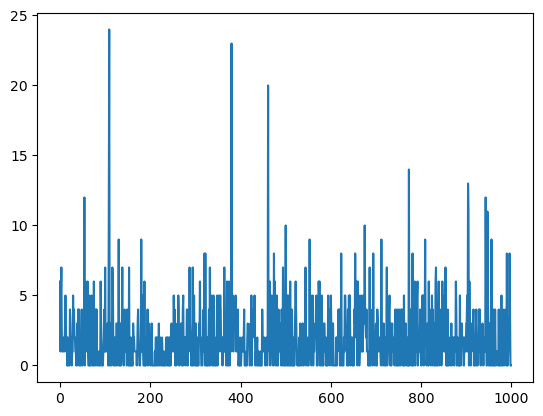

In [13]:
score.tp.plot()

In [14]:
#predicts_submission.to_csv('submission.csv', index=False)

# Cleaning wrong matches with LGBM

In [15]:
clean_wrong_matches = True

## Calculating features 'X_test' for predictions

In [16]:
def categorize_features (X: pd.DataFrame):
    obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)
    for feature in obj_feat:
        X[feature] = pd.Series(X[feature], dtype="category")
    return X
    
def get_y_class (y):
    return (y > 0.5).astype("bool")

In [17]:
if clean_wrong_matches:
    X_test = preds_df.merge (topic_features, how='inner', on='id')
    X_test.drop (columns = ['language', 'has_content', 'description'], inplace=True)
    X_test.rename (columns = {'id': 'topic_id', 'title':'topic_title'}, inplace=True)
    X_test = X_test.merge (content_features, how='inner', left_on='content_ids', right_on='id')
    X_test.drop (columns = ['title', 'description', 'text', 'id'], inplace=True)
    X_test = categorize_features (X_test)
    display (X_test, X_test.dtypes)

topic_id     content_ids                        topic_title  \
0      t_6c7987f04f23  c_d1c399a56d01  although  even though  and though   
1      t_6c7987f04f23  c_7957d7c64519  although  even though  and though   
2      t_6c7987f04f23  c_a46d17d369c0  although  even though  and though   
3      t_6c7987f04f23  c_634a6fa4f5bc  although  even though  and though   
4      t_6c7987f04f23  c_94e8a294551e  although  even though  and though   
...               ...             ...                                ...   
49995  t_9f6ffae2058a  c_603b08cb0b3d                        爬泳 自由泳 基本技巧   
49996  t_9f6ffae2058a  c_971e7e9e6f81                        爬泳 自由泳 基本技巧   
49997  t_9f6ffae2058a  c_7c7866f27835                        爬泳 自由泳 基本技巧   
49998  t_9f6ffae2058a  c_3c298b338583                        爬泳 自由泳 基本技巧   
49999  t_9f6ffae2058a  c_c786cc3a3316                        爬泳 自由泳 基本技巧   

      channel category    level          parent      kind language  
0      5139e9   source  Level 7  t_d04dcbc3ccc1     video       ar  
1      5139e9   source  Level 7  t_d04dcbc3ccc1     video       ar  
2      5139e9   source  Level 7  t_d04dcbc3ccc1     video       ar  
3      5139e9   source  Level 7  t_d04dcbc3ccc1     video       ar  
4      5139e9   source  Level 7  t_d04dcbc3ccc1     video       ar  
...       ...      ...      ...             ...       ...      ...  
49995  da1fa7   source  Level 3  t_f56c7044246e  document       zh  
49996  da1fa7   source  Level 3  t_f56c7044246e     video       zh  
49997  da1fa7   source  Level 3  t_f56c7044246e     video       zh  
49998  da1fa7   source  Level 3  t_f56c7044246e  document       zh  
49999  da1fa7   source  Level 3  t_f56c7044246e  exercise       zh  

[50000 rows x 9 columns]

topic_id       category
content_ids    category
topic_title    category
channel        category
category       category
level          category
parent         category
kind           category
language       category
dtype: object

In [18]:
#corr_df
#preds_df = preds_df.merge (corr_df, how='left', on = 'content_ids')
#preds_df['match'] = (preds_df.id == preds_df.topic_id)
#preds_df

# Get model (load existing model or train model)

In [19]:
import lightgbm as lgb

if os.path.exists(private_files_path) and clean_wrong_matches:
    for dirname, _, filenames in os.walk(private_files_path):
        for filename in filenames:
            filepath = os.path.join(dirname, filename)
    model = lgb.Booster(model_file=filepath)
    print ('Loaded model from :', filepath)
elif clean_wrong_matches:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import precision_score
    import lightgbm as lgb
    import optuna
    import datetime
        
    objective = 'binary'
    boosting_type = 'dart'

    def objective_lgbm(trial):
    
        param = {
            'boosting_type': boosting_type,
            'objective': objective,
            'is_unbalance': 'true',
            'metric': 'precision_score',
            'pos_bagging_fraction': trial.suggest_float('pos_bagging_fraction',0.1,1),
            'neg_bagging_fraction': trial.suggest_float('neg_bagging_fraction',0.1,1),
            'num_leaves': trial.suggest_int('num_leaves', 10,60),
            'max_depth': trial.suggest_int('max_depth', 10,60),
            'min_split_gain': trial.suggest_float('min_split_gain',0.1,1),
            'colsample_bytree': trial.suggest_float('colsample_bytree',0.1,1),
            'reg_alpha' : trial.suggest_float('reg_alpha',0.1,10),
            'reg_lambda': trial.suggest_float('reg_lambda',0.1,10),
            'n_estimators': trial.suggest_int('n_estimators', 150,350),
            'learning_rate': trial.suggest_float('learning_rate', 0.01,0.1),
            'verbosity': -1
        }
        num_boost_rounds = trial.suggest_int('num_boost_rounds', 50,400)
        model = lgb.train(param, train_data, num_boost_rounds)
        preds = model.predict(X_val)
        pred_labels = np.rint(preds)
        score = round(precision_score(y_val, pred_labels),4)
        return score
    
    # building a dataframe 'mix_matches' with 50% true topic-content matches and 50% false topic-content matches
    df_aux = preds_df.merge (corr_df, how='left', on='content_ids')
    true_matches = df_aux[df_aux['id'] == df_aux['topic_id']]
    true_matches_val = len(df_aux[df_aux['id'] == df_aux['topic_id']])
    false_matches = df_aux[df_aux['id'] != df_aux['topic_id']].sample(n=samples)
    mix_matches = pd.concat([true_matches, false_matches])
    mix_matches['y'] = (mix_matches.id == mix_matches.topic_id)
    mix_matches.drop (columns='topic_id', inplace=True)

    # building X features and y target 
    y = mix_matches['y']
    X = mix_matches.merge (topic_features, how='inner', on='id')
    #X = X.merge (content_features, how='inner', left_on='content_ids', right_on='id')
    X.drop (columns = ['language', 'has_content', 'description', 'y'], inplace=True)
    X.rename (columns = {'id': 'topic_id', 'title': 'topic_title'}, inplace=True)
    X = X.merge (content_features, how='inner', left_on='content_ids', right_on='id')
    X.drop (columns = ['title', 'description', 'text', 'id'], inplace=True)

    # preparing X and y for model: changing dtype to "category" and creating train/val sets
    X = categorize_features (X)

    print(f"Training features of shape {X.shape}")
    display (X)
    print(f"Training labels of shape {y.shape}")
    display (y)
    
    X_train, X_val, y_train, y_val = train_test_split (X, y, test_size = 0.3, random_state=42)

    train_data = lgb.Dataset(X_train, label = y_train)

    # get best hyperparameters
    study_lgbm = optuna.create_study(direction = 'maximize',study_name = "LGBM")
    study_lgbm.optimize(objective_lgbm, n_trials=50)

    trial_lgbm = study_lgbm.best_trial
    print("Model Accuracy --> ",trial_lgbm.value)
    print("Model's Best parameters --> ",trial_lgbm.params)

    # fit model and get score
    num_boost_rounds = trial_lgbm.params['num_boost_rounds']
    del trial_lgbm.params['num_boost_rounds']
    trial_lgbm.params['boosting_type'] = boosting_type
    trial_lgbm.params['objective'] = objective
    trial_lgbm.params['is_unbalance'] = True
    trial_lgbm.params['verbosity'] = -1
    print("Using parameters --> ",trial_lgbm.params)
    model = lgb.train(trial_lgbm.params, train_data, num_boost_rounds)
    pred_model = model.predict(X_val)
    pred_model = get_y_class (pred_model)
    score = precision_score(y_val, pred_model)
    print('\nLightGBM Model accuracy score: {0:0.4f}'.format(score))
    from sklearn.metrics import confusion_matrix
    print('\nConfusion Matrix : \n' + str(confusion_matrix(y_val,pred_model)))
    
    # save model
    date = datetime.datetime.now().strftime('%d%m%y-%H%M')
    model_filename = f"lgb-classifier-{date}.txt"
    model.save_model (model_filename)
    print ('\nSaved model as ', model_filename)

Training features of shape (2980, 9)


topic_id     content_ids  \
0     t_65e12b3617c4  c_4f3aaa52f978   
1     t_65e12b3617c4  c_157e85f91382   
2     t_65e12b3617c4  c_afff7e3e2f54   
3     t_65e12b3617c4  c_d770b0a090a2   
4     t_65e12b3617c4  c_545b93cedf77   
...              ...             ...   
2975  t_3ce2be2bb69d  c_c1b0415c4d4d   
2976  t_04cfcedd70ba  c_35c585975767   
2977  t_86b3d4f05db4  c_48850b0a9d34   
2978  t_9dd8ffc0f5c9  c_ea4c2b9585f7   
2979  t_2354d73a4f52  c_11b2db73798a   

                                            topic_title channel category  \
0             ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام   7b47c5   source   
1             ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام   7b47c5   source   
2             ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام   7b47c5   source   
3             ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام   7b47c5   source   
4             ح وار  هاد ئ  ب ي ن  الص  م ت  و الك لام   7b47c5   source   
...                                                 ...     ...      ...   
2975                                           ಸ ರ ಮ ಡಲ  217993   source   
2976                    looking for information  recap   2ee29d  aligned   
2977  lesson 14  fractional lengths in triangles and...  0ec697   source   
2978                                   વ ભ જ યત ન  ચ વ   4662df   source   
2979                 lesson 7  no bending or stretching  0ec697   source   

        level          parent      kind language  
0     Level 4  t_810b29abd1d7     html5       ar  
1     Level 4  t_810b29abd1d7     html5       ar  
2     Level 4  t_810b29abd1d7     video       ar  
3     Level 4  t_810b29abd1d7     html5       ar  
4     Level 4  t_810b29abd1d7     html5       ar  
...       ...             ...       ...      ...  
2975  Level 5  t_218593f8acac     html5       kn  
2976  Level 4  t_62df4ee9a94d  document       en  
2977  Level 5  t_bfeba6139534  document       en  
2978  Level 4  t_ef8f1e7d1fad  exercise       gu  
2979  Level 5  t_518a87ab3377     video       en  

[2980 rows x 9 columns]

Training labels of shape (2980,)


51        True
154       True
221       True
224       True
300       True
         ...  
7507     False
14902    False
21313    False
18473    False
5478     False
Name: y, Length: 2980, dtype: bool

[I 2023-03-08 20:27:12,504] A new study created in memory with name: LGBM
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-03-08 20:27:12,979] Trial 0 finished with value: 0.9416 and parameters: {'pos_bagging_fraction': 0.7503569334035254, 'neg_bagging_fraction': 0.3396317494189569, 'num_leaves': 55, 'max_depth': 29, 'min_split_gain': 0.22833824763024257, 'colsample_bytree': 0.799857825787092, 'reg_alpha': 0.5228118942019213, 'reg_lambda': 3.7445664570131636, 'n_estimators': 306, 'learning_rate': 0.0924499806739736, 'num_boost_rounds': 112}. Best is trial 0 with value: 0.9416.
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
[I 2023-03-08 20:27:1

Model Accuracy -->  0.9624
Model's Best parameters -->  {'pos_bagging_fraction': 0.5278139056726233, 'neg_bagging_fraction': 0.10356384181851676, 'num_leaves': 12, 'max_depth': 40, 'min_split_gain': 0.10983692840251935, 'colsample_bytree': 0.20055932729604398, 'reg_alpha': 3.133015694942034, 'reg_lambda': 2.182690853620345, 'n_estimators': 167, 'learning_rate': 0.017240889585861813, 'num_boost_rounds': 339}
Using parameters -->  {'pos_bagging_fraction': 0.5278139056726233, 'neg_bagging_fraction': 0.10356384181851676, 'num_leaves': 12, 'max_depth': 40, 'min_split_gain': 0.10983692840251935, 'colsample_bytree': 0.20055932729604398, 'reg_alpha': 3.133015694942034, 'reg_lambda': 2.182690853620345, 'n_estimators': 167, 'learning_rate': 0.017240889585861813, 'boosting_type': 'dart', 'objective': 'binary', 'is_unbalance': True, 'verbosity': -1}

LightGBM Model accuracy score: 0.9624

Confusion Matrix : 
[[281  18]
 [134 461]]

Saved model as  lgb-classifier-080323-2027.txt


# New Predictions

In [20]:
if clean_wrong_matches:
    # get predictions
    preds_lgbm = model.predict(X_test)
    preds_lgbm = get_y_class (preds_lgbm)
    print ('\nPredictions: ', preds_lgbm[-50:])
    print (pd.DataFrame(preds_lgbm).value_counts())
    #put predictions in final format
    df_preds_aux = preds_df[preds_lgbm]
    print (df_preds_aux.groupby('id').count())
    df_preds_aux = df_preds_aux.groupby(['id']).apply (lambda x : ' '.join (x.iloc[:, 1])).reset_index()
    df_preds_aux.rename (columns = {0: 'content_ids'}, inplace=True)
    print (df_preds_aux)
    predicts_submission = pd.DataFrame(topics_df.id).merge (df_preds_aux, how ='left', on = 'id')
    predicts_submission.rename(columns={'id':'topic_id'}, inplace=True)
    predicts_submission.fillna(' ', inplace=True)

    display(predicts_submission)
    
    # submissions
    predicts_submission.to_csv('submission.csv', index=False)


Predictions:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
False    26611
True     23389
dtype: int64
                content_ids
id                         
t_0028be2658cd           50
t_00f08b5587ec           50
t_00f8f6a30cb4           50
t_01ede81d2b56           27
t_01fbe16686b8           49
...                     ...
t_fd0fb536fd1e           48
t_fe4f2754d822           13
t_fe9a84bea66d           32
t_fea53cc2a5bb           37
t_fec51244ee9c            3

[648 rows x 1 columns]
                 id                                        content_ids
0    t_0028be2658cd  c_69b440b1fe03 c_a1f2d211e47d c_422a68186093 c...
1    t_00f08b5587ec  c_cb68908eb41f c_703a484272f8 c_ebfa04e074ca c...
2    t_00f8f6a30cb4  c_db9a6d990873

topic_id                                        content_ids
0    t_82a81296bfcb  c_f8daafb707ff c_c975149bb278 c_f58f1ca8f8e2 c...
1    t_57184a8dbc38  c_a4b44296fedd c_c724519d5189 c_854bbc6d8991 c...
2    t_baee9b9c9124                                                   
3    t_4449c7e083b5                                                   
4    t_8d679e99a7eb                                                   
..              ...                                                ...
995  t_76d82172ed52  c_ada3daf9b08f c_37acc154d14f c_22788e453d59 c...
996  t_eab9b17da96c  c_b577ead16670 c_e63f88495ab5 c_018eecf95daa c...
997  t_27e61aaaf76d                                                   
998  t_80e1ae738816                                                   
999  t_6cb31d2e3b37  c_c44ddf6bff1f c_1b5b0fa45285 c_c67ecf32cfe9 c...

[1000 rows x 2 columns]

In [21]:
predicts_submission.content_ids.apply (lambda x: len(x.split()))

0      43
1      32
2       0
3       0
4       0
       ..
995    15
996    50
997     0
998     0
999    37
Name: content_ids, Length: 1000, dtype: int64

# Final Score

In [22]:
if clean_wrong_matches and scoring:
    score = calculate_F2score(predicts_submission.sort_values('topic_id'), correlations_df)
    if score is not None:
        display(score)
        print ('F2 mean score:', score.f2.mean())
        print ('Correct predictions:', score.tp.sum())
        print ('Topics to match:', len(topics_df))
        print ('False positives:', score.fp.sum())
        print ('False negatives:', score.fn.sum())
        print ('Contents to match:', len(corr_df.merge (topics_df.id, how = 'inner', left_on='topic_id', right_on='id')))


Calculating scores...

F2 score calculation finished.


topic_id                                   content_ids_pred  \
0    t_0028be2658cd  c_69b440b1fe03 c_a1f2d211e47d c_422a68186093 c...   
1    t_00f08b5587ec  c_cb68908eb41f c_703a484272f8 c_ebfa04e074ca c...   
2    t_00f8f6a30cb4  c_db9a6d990873 c_e0d52ded1239 c_16c4080ce449 c...   
3    t_00f9a52a69aa                                                      
4    t_0121cfce3380                                                      
..              ...                                                ...   
995  t_fe596f659986                                                      
996  t_fe9a84bea66d  c_294ac6561305 c_e42e56e529e9 c_53a3bba84935 c...   
997  t_fea53cc2a5bb  c_a7f46fcc6879 c_8d0587f75b8c c_ccdcff5f32bf c...   
998  t_fec51244ee9c       c_f6f3b9a07ecd c_dabeaf9edb67 c_3ebda6d11a59   
999  t_fecbd43488e6                                                      

                                    content_ids_actual  tp  fp  fn  precision  \
0    c_172f50f1d187 c_1d9b3951fee1 c_623f1b7d4d4b c...   6  44   2   0.120000   
1         c_c69b760e6e02 c_d331e7fc41c9 c_fe3240b54d2b   1  49   2   0.020000   
2    c_2a12adb0d7e9 c_3a25e9a54b70 c_3e700a34cd5a c...   5  45   6   0.100000   
3    c_10157e74fc3a c_15f7c92ffc9c c_6960223b44a7 c...   0   0   7        NaN   
4    c_3b5890895f7b c_56d162a18918 c_b03d7c6f66bd c...   0   0   4        NaN   
..                                                 ...  ..  ..  ..        ...   
995  c_0dae593df013 c_274c8a07fbe8 c_7d64c85548c7 c...   0   0   6        NaN   
996  c_0496ecbb88c7 c_05ef2b4fab20 c_859e82e29868 c...   3  29  11   0.093750   
997  c_16e0451f3c84 c_1e684541698f c_3841dcd287dd c...   3  34  16   0.081081   
998                                     c_d0c840805046   0   3   1   0.000000   
999                      c_bd7601d2d8e1 c_e8e1d8880f27   0   0   2        NaN   

       recall        f2  
0    0.750000  0.365854  
1    0.333333  0.080645  
2    0.454545  0.265957  
3    0.000000  0.000000  
4    0.000000  0.000000  
..        ...       ...  
995  0.000000  0.000000  
996  0.214286  0.170455  
997  0.157895  0.132743  
998  0.000000  0.000000  
999  0.000000  0.000000  

[1000 rows x 9 columns]

F2 mean score: 0.08016557263870663
Correct predictions: 1039
Topics to match: 1000
False positives: 22350
False negatives: 3633
Contents to match: 4672


In [23]:
predicts_submission.to_csv('submission.csv', index=False)